In [3]:
def dihotom(func):
    import pandas as pd
    import numpy as np
    ep = 10**(-6)
    de = ep/3
    a = -10
    b = 10
    while(abs(a-b)>ep):
        c = (a + b - de)/2
        d = (a + b + de)/2
        if (func(c)<=func(d)):
            b = c
        else:
            a = d
    x_min = (a-b)/2
    return x_min

In [4]:

def is_lip(func, start, finish):
    try:
        diff_func = derivative(func,g)
    except Exception:
        return False
    interval = sp.Interval(start, finish)
    if interval != sp.calculus.util.continuous_domain(diff_func, g, interval):
        return False
    return True

In [5]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
in_k = pd.DataFrame({'xi':[1,2,3,4,5],'yi':[0, -1, -3, 2, -2]})
def F1(a,b):
    return sum([(a*in_k.xi[i] - b + in_k.yi[i] )**2 for i in range(5)])
def F3(a,b):
    return max([abs(a*in_k.xi[i] - b + in_k.yi[i]) for i in range(5)])
a0 = 2
b0 = 4
g1 = 0.8
g2 = 0.6
g = sp.Symbol('g')
def f1(g):
    return(F1(a0*g-g1,b0*g-g2))
def f3(g):
    return(F3(a0*g-g1,b0*g-g2))
beg = -10
fin = 10

def lip_const(func, start, finish):
    import numpy as np
    if not is_lip(func, start, finish):
        return max([abs(derivative(func,k)) for k in np.arange(-10,10,0.01)])
    diff_func = derivative(func,g)
    max_x = dihotom(func)
    max_y = -1*derivative(func,max_x)
    return max_y

# липшицевы ли функции
print(is_lip(f1,beg,fin))
print(is_lip(f3,beg,fin))

True
False


In [6]:
#метод ломаных 
def Lom(f,L,beg,fin):
    out_table = pd.DataFrame({'x':[],'p':[],'2L*delta':[]})
    a = beg
    b = fin
    n = 0
    x = (f(a)-f(b) + L*(a+b))/(2*L)
    p = (f(a)+f(b) + L*(a-b))/2
    delta = (f(x) - p)/(2*L)
    while(delta >= 10**(-6)):
        line = {'x':x,'p':p,'2L*delta':2*L*delta}
        x1 = x - delta
        x2 = x + delta
        p = (f(x)+p)/2
        if (f(x1)<f(x2)):
            x = x1
        else:
            x = x2
        
        out_table=out_table.append(line,ignore_index=True)
        delta = (f(x) - p)/(2*L)
        n = n +1
    line = {'x':x,'p':p,'2L*delta':2*L*delta}
    out_table=out_table.append(line,ignore_index=True)
    print(out_table)
    
    return "end"
    

In [7]:
print(Lom(f3,lip_const(f3,beg,fin),beg,fin))

           x             p  2L*delta
0   0.900000 -3.552714e-14  3.000000
1   0.650000  1.500000e+00  2.000000
2   0.816667  2.500000e+00  0.666667
3   0.872222  2.833333e+00  0.222222
4   0.890741  2.944444e+00  0.074074
5   0.896914  2.981481e+00  0.024691
6   0.898971  2.993827e+00  0.008230
7   0.899657  2.997942e+00  0.002743
8   0.899886  2.999314e+00  0.000914
9   0.899962  2.999771e+00  0.000305
10  0.899987  2.999924e+00  0.000102
11  0.899996  2.999975e+00  0.000034
12  0.899999  2.999992e+00  0.000011
end


In [11]:
#метод Ньютона-Расфона
def N_r(f,L,beg):
    out_table = pd.DataFrame({'x':[],'f':[],'diff_f':[]})    x = beg
    n = 0
    f_d1 = derivative(f,x)
    f_ = f(x)
    f_d2 = derivative(f,x,2)
    while(abs(f_d1)>10**(-6)):
        line = {'x':x,'f':f_,'diff_f':f_d1}
        out_table=out_table.append(line,ignore_index=True)
        n = n + 1
        x1 = x
        x = x - f_/f_d1
        f_d1 = derivative(f,x)
        f_ = f(x)
        f_d2 = derivative(f,x,2)
        if(f_d2 <= 0):
            print("в ходе вычислений пройдена точка перегиба, метод Ньютона-Расфона расходится, так как функция больше не выпукла вниз и значение второй производной отрицательно ",f_d2)
            line = {'x':x,'f':f_,'diff_f':f_d1}
            out_table=out_table.append(line,ignore_index=True)
            break
    print(out_table)
    x = np.arange(-10,10,0.1)
    plt.plot(x,f(x))
    plt.plot(x,derivative(f,x))
   
    return "end"

в ходе вычислений пройдена точка перегиба, метод Ньютона-Расфона расходится, так как функция больше не выпукла вниз и значение второй производной отрицательно  -55.122401861862684
           x            f       diff_f
0  10.000000  5176.600000  1112.000000
1   5.344784  1300.262064   553.374101
2   2.995086   331.264865   271.410331
3   1.774555    89.381832   124.946548
4   1.059194    30.704444    39.103280
5   0.273980    36.993663   -55.122402
end


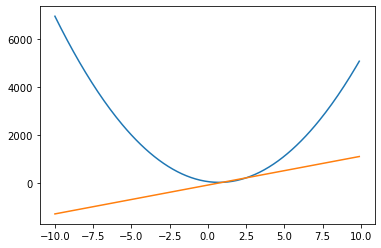

In [12]:
print(N_r(f1,lip_const(f1,beg,fin),fin))
